In [1]:
# Carguemos modulos 

import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Carguemos un dataset 
penguins = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/penguins_size.csv")

In [3]:
# Preprocesamiento 

# Nombres de las columnas
NombreVars = penguins.columns
NombreVars

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [4]:
# Dimensiones del dataframe 
penguins.shape

(344, 7)

In [5]:
# Informacion de las columnas
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# Valores faltantes
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
# Exploremos los datos 
# Veamos algo de la informacion que provee la columnas species
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

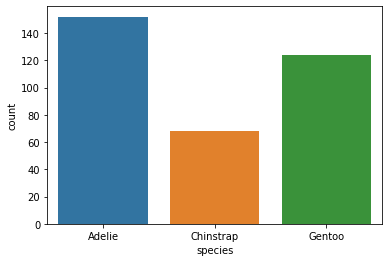

In [13]:
# veamos un countplot 
sns.countplot(x = "species", data = penguins)
plt.show()

In [19]:
# Cuales son los posibles valores de la columna sex
penguins.sex.unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

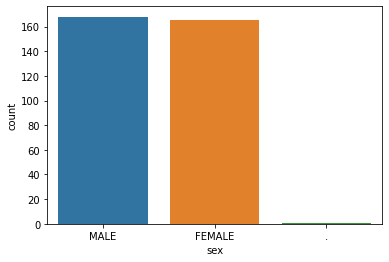

In [18]:
# Veamos un countplot de la columna sex
sns.countplot(x ="sex", data =penguins)
plt.show()

In [23]:
# veamos los posibles valores de la columna island
penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

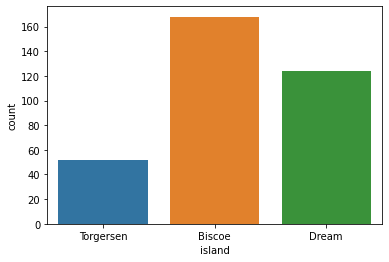

In [25]:
sns.countplot(x = "island", data = penguins)
plt.show()

In [28]:
# Veamos que podemos hacer con los valores faltantes
# la columna sex tiene 10 valores faltantes
# rellenar los elementos faltantes con el valor "FEMALE"
penguins["sex"] = penguins["sex"].fillna("FEMALE")

# La columna sex tiene algunos valores "."
# Encontremos la informacion relacionada con ese valor "." 
# en la columna sex : Deseo recuperar los indices cuyo valor
# en la columna sex es un "."
penguins.loc[penguins.sex == ".", :]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [29]:
# Opto por eliminar la observacion que corresponde al valor
# "." de la columna sex
penguins = penguins.drop([336], axis = 0)

In [34]:
# Rellenemos los valores faltantes de las columnas con informacion cuantitativa 
penguins.culmen_length_mm = penguins.culmen_length_mm.fillna(penguins.culmen_length_mm.mean())
penguins["culmen_depth_mm"] = penguins["culmen_depth_mm"].fillna(penguins["culmen_depth_mm"].max())
penguins.flipper_length_mm = penguins.flipper_length_mm.fillna(penguins.flipper_length_mm.min())
penguins["body_mass_g"] = penguins["body_mass_g"].fillna(penguins["body_mass_g"].quantile(0.45))
penguins.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Figure size 432x288 with 0 Axes>

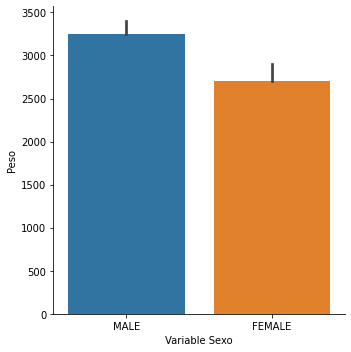

<Figure size 432x288 with 0 Axes>

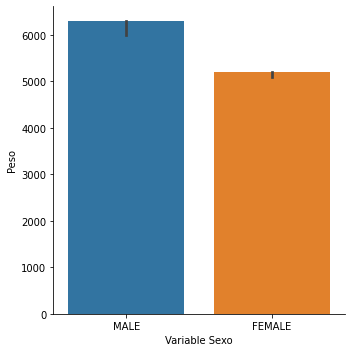

In [41]:
# Grafico Bidimensional : COnsidere dos variables
# x = variable categorica/cualitativa (sex, island, species)
# y = variable cuantitativa (culmen_length_mm,culmen_depth_mm,flipper_length_mm , body_mass_g  )

# catplot : veamos como se comporta la variable body_ass_g en funcion del sex
plt.figure(num = 1)
sns.catplot(x = "sex",
            y = "body_mass_g",
            kind = "bar",
            data = penguins,
            estimator= np.min)
plt.xlabel("Variable Sexo")
plt.ylabel("Peso")
plt.show()

plt.figure(num = 2)
sns.catplot(x = "sex",
            y = "body_mass_g",
            kind = "bar",
            data = penguins,
            estimator= np.max)
plt.xlabel("Variable Sexo")
plt.ylabel("Peso")
plt.show()

In [36]:
# veamos la documentacion de sns.catplot
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7f53fbdd9af0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Categorical dist